# Detect-to-Retrieve: Efficient Regional Aggregation for Image Search

[Source: ](https://raw.githubusercontent.com/tensorflow/models/master/research/delf/delf/python/examples/matched_images_example.jpg)![](https://raw.githubusercontent.com/tensorflow/models/master/research/delf/delf/python/examples/matched_images_example.jpg)

### 1. Abstract

This paper presents a new dataset of landmark bounding boxes, based on the Google Landmarks dataset, that includes 86k images with manually curated boxes from 15k unique landmarks. The authors use this dataset to train a landmark detector, which is then leveraged to improve image retrieval accuracy. They also introduce a novel regional aggregated selective match kernel (R-ASMK) that effectively combines information from detected regions into an improved holistic image representation. The complete image retrieval system improves upon the previous state-of-the-art by significant margins on the Revisited Oxford and Paris datasets. Code and data is available on the project webpage.

### Table of Contents
1. [Abstract](#1.-Abstract)
2. [Introduction](#2.-Introduction)
3. [Related Work](#3.-Related-Work)    
4. [Google Landmark Boxes Dataset](#4.-Google-Landmark-Boxes-Dataset)
5. [Regional Search and Aggregation](#5.-Regional-Search-and-Aggregation)
    - [5.1. Regional Search](#5.1.-Regional-Search)
    - [5.2. Regional Aggregated Match Kernels](#5.2.-Regional-Aggregated-Match-Kernels)
6. [Experiments](#6.-Experiments)
    - [6.1. Landmark Detection](#6.1.-Landmark-Detection)
    - [6.2.Image Retrieval](#6.2.-Image-Retrieval)
    - [6.2.1. Regional Search](#6.2.1.-Regional-Search)
    - [6.2.2. Regional Aggregated Match Kernels](#6.2.2.-Regional-Aggregated-Match-Kernels)
    - [6.2.3. Comparison Against State-of-the-Art](#6.2.3.-Comparison-Against-State-of-the-Art)
    - [6.2.4. Discussion](#6.2.4.-Discussion)
7. [Conclusion](#7.-Conclusions)
8. [Resources](#8.-Resources)

### 2. Introduction

This paper addresses the problem of image retrieval, where a system is supposed to efficiently retrieve similar images from a database. Image retrieval systems typically have two stages: filtering and re-ranking. Filtering involves ranking the images in the database according to their similarity to the query image. Re-ranking involves further inspection of the most similar images from the first stage to re-rank them. Traditional methods for image retrieval used hand-crafted local features, spatial matching, and geometric verification. However, these methods tend to fail when relevant objects do not occupy a large enough fraction of database images, especially in cluttered scenes. The most common solution to this problem is to extract and store image representations for regions-of-interest in the database, but this approach leads to a large number of irrelevant regions and imposes high memory and latency costs with only small accuracy gains.

__Contributions__: The authors of this research have made three contributions to the field of image retrieval. First, they have introduced a dataset of manually boxed landmark images, which can be used to train detectors for robust landmark localization. Second, they have developed more efficient regional search systems that improve accuracy for small objects with only a modest increase to the database size. Third, they have proposed a new representation for images, called regional aggregated match kernels, which leverage selected image regions to produce a discriminative image representation. This new representation outperforms previous regional search systems and results in a 9.3% absolute mean average precision improvement on the Revisited Oxford-Hard dataset and a 1.9% improvement on the Revisited Paris-Hard dataset.

__Regional search and aggregation.__: The authors of this research have reviewed two types of approaches in image retrieval systems: regional search and regional aggregation. Regional search involves describing regions independently in the database in order to retrieve subimages, while regional aggregation uses selected regions to improve image representations. Many previous papers have used techniques such as VLAD, Fisher Vectors, multi-scale grids, Selective Search, and maximally stable extremal regions to describe regions. However, these methods tend to have high memory and complexity costs. In contrast, the authors propose an efficient regional search method using a custom-trained detector. Additionally, the authors note that previous regional aggregation methods used large numbers of regions per image and pooled CNN features, while their approach uses a small set of regions per image and a new match kernel for regional aggregation.

### 3. Related Work

__Datasets__: The authors of this research have created a manually curated dataset of landmark bounding boxes, which they claim to be the first of its kind. The dataset, called GLD, contains 86k boxed images from 15k unique landmarks, which were annotated by human raters. This dataset is unique in comparison to previous datasets such as the one used by Gordo et al. [9], which used SIFT matching to estimate boxes in landmark images, which may contain localization errors. Additionally, the OpenImages dataset contains 9M images, annotated with generic object bounding boxes, but these classes make up a small fraction of the entire dataset. The GLD dataset aims to represent landmarks in a balanced manner in order to train detectors that can localize a wide variety of objects. To achieve this, the authors have separated part of the 1.2M training set into a validation set and randomly selected four training and four validation images per landmark, for a total of 58k and 36k boxed images for training and validation respectively. Examples of annotated images are shown in Fig. 2. Some images were removed from the dataset if it was not possible to identify a prominent landmark.

Regional search and aggregation: The authors of this research have reviewed two types of approaches for region selection in image retrieval systems: regional search and regional aggregation. Regional search involves encoding selected regions independently in the database to allow for retrieval of subimages, while regional aggregation uses selected regions to improve image representations. Many previous papers have used techniques such as VLAD, Fisher Vectors, multi-scale grids, Selective Search, and maximally stable extremal regions to describe regions. However, these methods tend to have high memory and complexity costs. In contrast, the authors propose an efficient regional search method using a custom-trained detector. Additionally, previous regional aggregation methods used large numbers of regions per image and pooled CNN features, while the authors' approach uses a small set of regions per image and a new match kernel for regional aggregation.

### 4. Google Landmark Boxes Dataset

The Google Landmark Boxes dataset is a collection of images of landmarks with manually annotated bounding boxes. The dataset is built upon the Google Landmarks dataset (GLD) which contains 1.2M images of 15k unique landmarks, including a variety of objects such as buildings, monuments, bridges, statues, and natural landmarks. The goal of the dataset is to capture the most prominent landmark in the image, with only one box per image. The dataset aims to represent landmarks in a balanced manner, with a random selection of four training and four validation images per landmark, yielding a total of 58k and 36k boxed images for training and validation respectively. The dataset also removes images that are not possible to identify a prominent landmark from the dataset, leaving a final dataset with 54k and 32k boxed images for training and validation respectively.

[Source : ](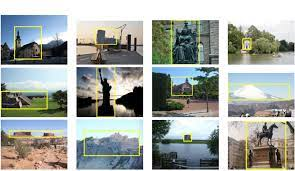)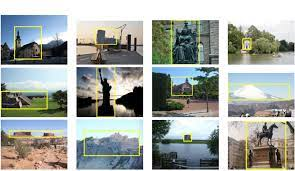

### 5. Regional Search and Aggregation

Our approach enhances image retrieval performance by utilizing bounding boxes predicted by a trained landmark detector. We build on top of deep local features (DELF) and aggregated selective match kernels (ASMK) which have been shown to be effective in image retrieval. Our approach uses a normalized aggregated residual, represented as $Φ(X_c)$, as the input for the image retrieval process. The value of α and τ are set to 3 and 0 respectively. This approach aims to improve the accuracy of image retrieval by using the information provided by the bounding boxes predicted by the trained landmark detector.

#### 5.1. Regional Search

In this section, image retrieval systems are discussed where regional descriptors are stored independently in the database. The system considers a query image X and a database of N images ${Y^{(n)}}$, where n ranges from 1 to N. The system is mainly interested in the experimental configuration where a query contains a well-localized region-of-interest, which is a common setting in image retrieval. For each database image, regions are predicted by a landmark detector, defining the subimages $Y^{(n,r)}$. The similarity between the query X and a database image $Y^{(n)}$ is computed by using max-pooling or average pooling individual regional similarities. 

$sim_{MAX}(X, Y^{(n)}) = max_{r=1,.....,Rn}K(X, Y^{n,r})$

$sim_{AVG}(X, Y^{(n)}) =\frac{1}{Rn} \sum_{r=1}^{Rn}K (X, Y^{n,r})$

Max-pooling assigns a score to a database image based on its highest-scoring subimage, while average pooling aggregates contributions from all subimages. Both variants are compared in the following section.

#### 5.2. Regional Aggregated Match Kernels

In this section, the idea is to utilize the detected bounding boxes to improve the aggregated representations of database images in order to produce discriminative descriptors without additional cost. The method extends the aggregated match kernel framework by Tolias et al. to regional aggregated match kernels. The average pooling similarity can be rewritten as:

$sim_{AVG}(X, Y^{(n)}) =γ(X )\sum_{c}\sum_{r}\frac{γ(Y^{n,r})}{Rn}σ\big(Φ(X_c)^{T}Φ(Y_c^{(n,r)})\big)$

Simple regional aggregation. For VLAD, this can be further expanded as:

$sim^{(R-VLAD)}(X, Y ^{(n)}) = γ(X )\sum_{c}\sum_{r}\frac{γ(Y^{n,r})}{Rn}V(X_c)^{T}V(Y_c^{(n,r)})$

$= \sum_{c}γ(X )V(X_c)^{T}\sum_{r}\frac{γ(Y^{n,r})}{Rn}V(Y_c^{n,r})$

$= \sum_{c}V_R(X_c)^{T}V_R(({Y_c^{(n,r)}})_r)$

where we define

$V_R((Y_c^{(n,r)})_r) = \frac{1}{R_n}\sum_{r}γ(Y^{(n,r)})V(Y_c^{(n,r)})$

The method suggests that average pooling of regional VLAD similarities can be performed using aggregated regional descriptors and does not require storage of each region's representation separately. This is referred as R-VLAD. Similarly, a similar approach is applied for ASMK, referred as Naive-R-ASMK. However, both R-VLAD and Naive-R-ASMK kernels present a problem when using many detected regions per image and large codebooks. For a given image region, most visual words will not be associated to any local feature, leading to many all-zero residuals for the region. Therefore, The R-ASMK kernel is developed to fix this weakness, inspired by the changes introduced by the original ASMK with respect to VLAD.

__R-ASMK__:We define the R-ASMK similarity between a query and a database image as:

$sim^{(R-ASMK)}(X, Y^{(n,r)}) = \sum_{c}σ\big(\hat{V}_R(X_c)^{T}\hat{V}_R((Y_c^{(n,r)})r)\big)$

where $\hat{V}_R((Y_c^{(n,r)})) = \frac{V_R(Y_c^{(n,r)})r}{||V_R((Y_c^{(n,r)})r)||}$ is the normalized
regionally aggregated residual corresponding to visual word
c.


__R-AMK.__ The kernels we presented in this section can be
regarded as different instantiations of a general regional
aggregated match kernel (R-AMK), defined as follows:

$K_R(X, Y) = \sum_{c∈C}σ\big(Φ_R((X_c^{(r)})r)^{T}Φ_R((Y_c^{(r)})r)\big)$

where $(X_c^{(r)})r$ denotes the sets of local descriptors quantized to visual word c, from each region of X. $Φ_R$ specializes to VR for R-VLAD, and to $\hat{V}_R$ for R-ASMK. Note that
this definition involves regional aggregation for both images,
while in this work we focus on the asymmetric case where
regional aggregation is applied to the database image only.
The asymmetric case is more relevant when the query image is itself a well-localized region-of-interest, which is a
common setup in image retrieval benchmarks.

__Binarization.__ Binarization is a strategy to reduce storage cost for aggregated representations in codebooks with a large number of visual words. It involves using the elementwise function b(x) = +1 if x > 0, −1 otherwise to obtain a binarized version of $Φ_R$, denoted superscript. This allows for scalable retrieval in these cases.

[Source: ](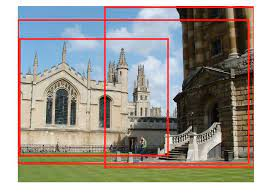)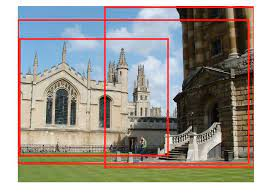

### 6. Experiments

1. Two types of experiments are presented: 
    1. landmark detection to evaluate the quality of object detector models trained on the new dataset.
    2. using the detected landmarks to improve image retrieval systems.

#### 6.1. Landmark Detection

Two types of detection models are trained on bounding box data: a single shot Mobilenet-V2 based SSD detector and a two stage Resnet-50 based Faster-RCNN. The evaluation metric used is Average Precision (AP) measured at 50% Intersection-over-Union ratio. Both models reach around 85% AP on the validation set within 500k steps (85.61% for Mobilenet-V2-SSD and 84.37% for Resnet-50-Faster-RCNN). The models were trained using the publicly available Tensorflow Object Detection API. These results suggest that accurate landmark localization can be achieved using the dataset. In terms of performance, the Mobilenet-V2-SSD variant runs at 27ms per image, while the Resnet-50-Faster-RCNN runs at 89ms, both numbers measured on a TitanX GPU.

[Source: ](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRR4dxzROP8C7tlGAkr7qxTW7ns6db-UKGv7g-et0vcxStxNF2b5G-b2NlE4xA9POMzgPM&usqp=CAU)![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRR4dxzROP8C7tlGAkr7qxTW7ns6db-UKGv7g-et0vcxStxNF2b5G-b2NlE4xA9POMzgPM&usqp=CAU)

#### 6.2. Image Retrieval

Regional search and regional aggregation experiments are conducted using the Oxford and Paris datasets (ROxf and RPar respectively) which have been corrected for annotation mistakes, and new query images and evaluation protocols were added. There are 70 query images for each dataset, with 4993 (6322) database images in the ROxf (RPar) dataset. The performance of the experiments is measured using mean average precision (mAP) and mean precision at rank 10 (mP@10) on Medium and Hard setups. Ablations focus on the Hard setup. Large-scale experiments are also performed using the R1M distractor set which contains 1,001,001 images.

__Image representation.__ The following setup is used in the experiments, unless indicated otherwise: The released DELF model is used, with the default configuration (maximum of 1000 features per region are extracted, with a required minimum attention score of 100), except that the feature dimensionality is set to 128 as in previous work. A 1024-sized codebook is used when computing aggregated kernels, and codebooks are trained on ROxf for retrieval experiments on RPar and vice-versa. The focus is on improving the core image representations for retrieval and not considering query expansion (QE) techniques such as Hamming QE, α QE, or diffusion. These methods could be incorporated to the system to obtain stronger retrieval performance.

__Region selection techniques.__ The Detect-to-Retrieve (D2R) framework adopts the trained Faster R-CNN detector described in Sec. 5.1. It is compared to previously proposed region selection techniques for image retrieval: the uniform grid (denoted RMACB) and Selective Search. To vary the number of regions per image, the following methods are used: (i) for D2R vary the landmark detector threshold, (ii) for RMACB, sweep the number of levels from 1 to 3, (iii) for SS, select the top {1, 2, 5, 10} boxes per image. For all region selection techniques, the original image is added as one of the selected regions.

__Implementation details.__ The aggregated kernel framework is implemented from scratch in Python/Tensorflow. A comparison against the reference MATLAB implementation shows that ASMK? with a 1024-sized codebook and DELF features obtains 37.91% mAP in the ROxf-Hard dataset, while the reference implementation obtains 37.08%. The reference implementation uses a similar configuration as Hamming Embedding (HE) with a projection matrix before binarization, residuals computed with respect to the median, and IDF, but our implementation did not find consistent improvements using these, so a simpler version was used. The reference implementation also uses multiple visual word assignments, but our preliminary experiments showed improved results using single assignment, which makes retrieval faster and simpler, thus it is adopted in the experiments. The implementation is extended to support regional search and aggregation techniques.

#### 6.2.1. Regional Search

The comparison of aggregated match kernels, region selection techniques and similarity computation methods on the ROxfHard dataset shows that when performing regional search, multiple regions are selected per image and stored independently in the database, leading to increased memory cost. Combining the proposed D2R regions with ASMK enhances mAP by 3.23% when using an average of 4.05 regions per image. The results of the comparison show that D2R-ASMK? achieves 40.65% mAP when using 4.05 regions per image, which is an improvement of 2.31% over the single-image ASMK? baseline. Other region selection approaches improve retrieval accuracy, but with significantly larger memory requirements. RMACB-ASMK? requires 9.08 regions/image to achieve 40.43% mAP. SS-ASMK? benefits from some regions, but performance decreases when a large number of regions are selected, since many of those regions are irrelevant. Average pooling of individual regional similarities improves upon the single-image baseline significantly, at low overhead memory requirements: D2RAV G-ASMK? achieves 40.35% mAP with only 1.96× storage cost. D2R-VLAD representation improves mAP from 30.17% (single-image) to 33.87% (2.87 regions/image). The D2R approach is effective even if the landmarks in the Google Landmark Boxes dataset present much larger variability than the landmarks encountered in the ROxf/RPar datasets.

#### 6.2.2. Regional Aggregated Match Kernels

In this section, the proposed regional aggregated match kernels are evaluated. In this experiment, region selection is used to produce an improved image representation, with no increase in the aggregated descriptor dimensionality. The comparison of different aggregation methods and region selection approaches on the ROxf-Hard dataset shows that both D2R-R-ASMK and D2R-R-ASMK? variants achieve substantial improvements compared to their baselines which do not use boxes for aggregation: 3.85% and 3.65% absolute mAP improvements, respectively. The comparison also shows that D2R approach outperforms other region selection methods, with RMACB and SS improving upon the baseline, however with limited gain of at most 1.5% mAP. The proposed kernels also outperform the regional search configuration where each region is indexed separately in the database. An ablation experiment is also performed to assess the performance of simpler regional aggregation methods: R-VLAD and Naive-R-ASMK. The results show that for R-VLAD, mAP improves from 30.17% (single-image) to 30.91% when using 2.4 regions per image, but degrades quickly as more regions are considered. For Naive-RASMK, no improvement is obtained when detected regions are used. In comparison, using the same detection threshold of 0.01, R-ASMK? obtains 41.6% mAP, showing that the improved aggregation technique performs well even when using a large number of regions.

#### 6.2.3. Comparison Against State-of-the-Art

The D2R-R-ASMK? technique is compared against state-of-the-art image retrieval systems. To make the system comparable with previously published results, a codebook with 65k visual words is used for this experiment. The DELF local feature is also re-trained on the Google Landmarks dataset, and spatial verification (SP) is used to re-rank the top 100 database images. The results presented in Table 2 on the ROxf and RPar dataset, using the Medium and Hard protocols, and the large-scale setup with R1M show that the D2R-R-ASMK? representation by itself improves mAP when compared to all previously published results. Spatial verification further boosts performance by about 3% mAP on ROxf, but surprisingly it slightly degrades performance on the RPar dataset. Re-training DELF on GLD improves performance by around 4%. The best results improve upon the previous state-of-the-art by 8.2% mAP on ROxf-Medium, 1.8% mAP on RPar-Medium, 9.3% mAP on ROxf-Hard and 1.9% in RPar-Hard, with similar gains in the large-scale setup.

__Memory.__ The DELF-D2R-R-ASMK? descriptors have the same dimensionality as DELF-ASMK? but the latter is sparser and consumes less memory in practice. In the large-scale ROxf+R1M dataset, the DELF-ASMK? requires 10.3GB while the DELF-D2R-R-ASMK? requires 27.6GB. However, the memory required by these descriptors is still much less than other local feature based approaches, such as HesAff-rSIFT-ASMK? which requires 62GB and HesAffNetHardNet++-ASMK? which requires approximately 86.8GB.

#### 6.2.4. Discussion

Our experiments have shown that selecting relevant image regions can significantly boost image retrieval performance. The regional aggregation method uses the detected regions to re-weight the local feature contributions and emphasize relevant visual patterns in the final image representation. However, it is important to perform both region selection and regional aggregation in a suitable manner. If the selected regions are not relevant to the objects of interest, regional aggregation will not be effective. Additionally, our experiments with naive versions of regional aggregation have shown that the aggregation needs to be performed in the right way.

It may seem unintuitive that the regional search method underperforms when compared to the regional aggregation technique. However, this can be understood by observing some retrieval result patterns. The addition of separate regional representations to the database may help retrieval of relevant small objects in cluttered scenes. However, it also increases the chances of finding localized regions which are similar but do not correspond to the same landmark. Regional aggregation, on the other hand, can help retrieval by re-balancing the visual information presented in an image. The features inside the main box are boosted but those outside are also used, generating a more suitable representation for image retrieval.

### 7. Conclusions

In summary, this paper presents an efficient regional aggregation method for image retrieval. The authors introduce a dataset of landmark bounding boxes and show that landmark detectors can be trained and leveraged for extracting regional representations. The proposed regional search method using these detectors not only provides superior retrieval performance but also better efficiency than existing regional methods. They also propose a novel regional aggregated match kernel framework that further improves retrieval accuracy. The full system achieved state-of-the-art performance by a large margin on two image retrieval datasets.

In [ ]:
_BOX_EXT = '.boxes'
_VIZ_SUFFIX = '_viz.jpg'
# Used for plotting boxes.
_BOX_EDGE_COLORS = ['r', 'y', 'b', 'm', 'k', 'g', 'c', 'w']

# Pace to report extraction log.
_STATUS_CHECK_ITERATIONS = 100


def _ReadImageList(list_path):
  """Helper function to read image paths.

  Args:
    list_path: Path to list of images, one image path per line.

  Returns:
    image_paths: List of image paths.
  """
  with tf.io.gfile.GFile(list_path, 'r') as f:
    image_paths = f.readlines()
  image_paths = [entry.rstrip() for entry in image_paths]
  return image_paths


def _FilterBoxesByScore(boxes, scores, class_indices, score_threshold):
  """Filter boxes based on detection scores.

  Boxes with detection score >= score_threshold are returned.

  Args:
    boxes: [N, 4] float array denoting bounding box coordinates, in format [top,
      left, bottom, right].
    scores: [N] float array with detection scores.
    class_indices: [N] int array with class indices.
    score_threshold: Float detection score threshold to use.

  Returns:
    selected_boxes: selected `boxes`.
    selected_scores: selected `scores`.
    selected_class_indices: selected `class_indices`.
  """
  selected_boxes = []
  selected_scores = []
  selected_class_indices = []
  for i, box in enumerate(boxes):
    if scores[i] >= score_threshold:
      selected_boxes.append(box)
      selected_scores.append(scores[i])
      selected_class_indices.append(class_indices[i])

  return np.array(selected_boxes), np.array(selected_scores), np.array(
      selected_class_indices)


def _PlotBoxesAndSaveImage(image, boxes, output_path):
  """Plot boxes on image and save to output path.

  Args:
    image: Numpy array containing image.
    boxes: [N, 4] float array denoting bounding box coordinates, in format [top,
      left, bottom, right].
    output_path: String containing output path.
  """
  height = image.shape[0]
  width = image.shape[1]

  fig, ax = plt.subplots(1)
  ax.imshow(image)
  for i, box in enumerate(boxes):
    scaled_box = [
        box[0] * height, box[1] * width, box[2] * height, box[3] * width
    ]
    rect = patches.Rectangle([scaled_box[1], scaled_box[0]],
                             scaled_box[3] - scaled_box[1],
                             scaled_box[2] - scaled_box[0],
                             linewidth=3,
                             edgecolor=_BOX_EDGE_COLORS[i %
                                                        len(_BOX_EDGE_COLORS)],
                             facecolor='none')
    ax.add_patch(rect)

  ax.axis('off')
  plt.savefig(output_path, bbox_inches='tight')
  plt.close(fig)


def main(argv):
  if len(argv) > 1:
    raise RuntimeError('Too many command-line arguments.')

  # Read list of images.
  print('Reading list of images...')
  image_paths = _ReadImageList(cmd_args.list_images_path)
  num_images = len(image_paths)
  print(f'done! Found {num_images} images')

  # Create output directories if necessary.
  if not tf.io.gfile.exists(cmd_args.output_dir):
    tf.io.gfile.makedirs(cmd_args.output_dir)
  if cmd_args.output_viz_dir and not tf.io.gfile.exists(
      cmd_args.output_viz_dir):
    tf.io.gfile.makedirs(cmd_args.output_viz_dir)

  detector_fn = detector.MakeDetector(cmd_args.detector_path)

  start = time.time()
  for i, image_path in enumerate(image_paths):
    # Report progress once in a while.
    if i == 0:
      print('Starting to detect objects in images...')
    elif i % _STATUS_CHECK_ITERATIONS == 0:
      elapsed = (time.time() - start)
      print(f'Processing image {i} out of {num_images}, last '
            f'{_STATUS_CHECK_ITERATIONS} images took {elapsed} seconds')
      start = time.time()

    # If descriptor already exists, skip its computation.
    base_boxes_filename, _ = os.path.splitext(os.path.basename(image_path))
    out_boxes_filename = base_boxes_filename + _BOX_EXT
    out_boxes_fullpath = os.path.join(cmd_args.output_dir, out_boxes_filename)
    if tf.io.gfile.exists(out_boxes_fullpath):
      print(f'Skipping {image_path}')
      continue

    im = np.expand_dims(np.array(utils.RgbLoader(image_paths[i])), 0)

    # Extract and save boxes.
    (boxes_out, scores_out, class_indices_out) = detector_fn(im)
    (selected_boxes, selected_scores,
     selected_class_indices) = _FilterBoxesByScore(boxes_out[0], scores_out[0],
                                                   class_indices_out[0],
                                                   cmd_args.detector_thresh)

    box_io.WriteToFile(out_boxes_fullpath, selected_boxes, selected_scores,
                       selected_class_indices)
    if cmd_args.output_viz_dir:
      out_viz_filename = base_boxes_filename + _VIZ_SUFFIX
      out_viz_fullpath = os.path.join(cmd_args.output_viz_dir, out_viz_filename)
      _PlotBoxesAndSaveImage(im[0], selected_boxes, out_viz_fullpath)

### 8. Resources

[Article](https://arxiv.org/pdf/1812.01584v2.pdf)

[Code](https://github.com/tensorflow/models/tree/master/research/delf)